<a href="https://colab.research.google.com/github/Angel-Oliva/2004927_IA_002-12206_A2024/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project.- Training a Machine Learning model on medical images.
Class Time: N4-N6 Thursday

Team members:


*   Aguilar López Sebastián Eucebio #1975946
*   Garcia Lira Esdras #1995008
*   Martínez Gámez América de los Ángeles #1933618
*   Oliva Villarreal Angel #2004926

## Introduction to the Project
This project aims to build a Convolutional Neural Network (CNN) to classify images of handwritten digits.
We will import necessary libraries, preprocess the data, train the model, and evaluate its performance.

**Importing Data**


In [1]:
import os
import zipfile

# Crear el directorio .kaggle y mover kaggle.json
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Descargar y descomprimir el conjunto de datos
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset
with zipfile.ZipFile('augmented-alzheimer-mri-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/augmented-alzheimer-mri-dataset')

# Listar archivos en la carpeta descomprimida
dataset_path = '/content/augmented-alzheimer-mri-dataset'
print(os.listdir(dataset_path))

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
 99% 377M/380M [00:17<00:00, 24.4MB/s]
100% 380M/380M [00:17<00:00, 22.2MB/s]
['AugmentedAlzheimerDataset', 'OriginalDataset']


**Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

**Preprocessing**

Cargando imágenes desde: /content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/MildDemented
Cargando imágenes desde: /content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/VeryMildDemented
Cargando imágenes desde: /content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/ModerateDemented
Cargando imágenes desde: /content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset/NonDemented


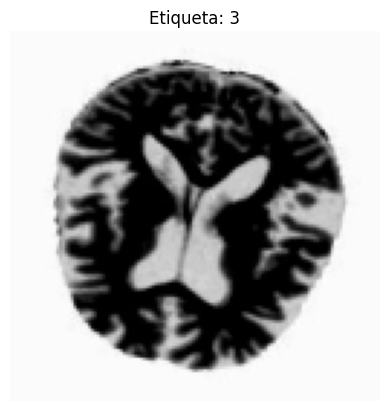

In [3]:
# Preprocessing
DATASET_PATH = '/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset'
images = []
labels = []

# Mapeo de categorías a números
category_mapping = {
    'MildDemented': 0,
    'VeryMildDemented': 1,
    'ModerateDemented': 2,
    'NonDemented': 3
}

# Crear un diccionario inverso para las categorías
inverse_category_mapping = {v: k for k, v in category_mapping.items()}

# Leer imágenes y etiquetas
for category in os.listdir(DATASET_PATH):
    category_path = os.path.join(DATASET_PATH, category)
    if os.path.isdir(category_path):
        print(f"Cargando imágenes desde: {category_path}")
        for filename in os.listdir(category_path):
            if filename.endswith('.png') or filename.endswith('.jpg'):
                img_path = os.path.join(category_path, filename)
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    img_resized = cv2.resize(image, (128, 128))
                    img_resized = cv2.bitwise_not(img_resized)
                    images.append(img_resized)
                    label = category_mapping.get(category)
                    if label is not None:
                        labels.append(label)

# Convertir listas a arrays de numpy
images = np.array(images)
labels = np.array(labels)

# Dividir el conjunto de datos en entrenamiento y validación
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Normalización de los valores de píxeles
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualizar una imagen de entrenamiento para confirmar la carga correcta.
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Etiqueta: {train_labels[0]}")
plt.axis('off')
plt.show()

**Structure and Training of Convolutional Artificial Neural Network (CNN)**

In [4]:
# Structure and Training of Convolutional Artificial Neural Network (CNN)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrenamiento de la CNN
history = model.fit(train_images.reshape(-1, 128, 128, 1), train_labels,
                    epochs=10,
                    validation_data=(test_images.reshape(-1, 128, 128, 1), test_labels))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.4798 - loss: 1.0981 - val_accuracy: 0.7144 - val_loss: 0.6307
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7832 - loss: 0.5127 - val_accuracy: 0.8210 - val_loss: 0.4235
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8827 - loss: 0.2903 - val_accuracy: 0.8639 - val_loss: 0.3766
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9338 - loss: 0.1779 - val_accuracy: 0.8666 - val_loss: 0.3790
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9615 - loss: 0.1030 - val_accuracy: 0.8691 - val_loss: 0.4190
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9739 - loss: 0.0728 - val_accuracy: 0.8777 - val_loss: 0.4541
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9833 - loss: 0.0495 - val_accuracy: 0.8791 - val_loss: 0.4924
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9838 - loss: 0.0419 - 

**CNN Accuracy Results**

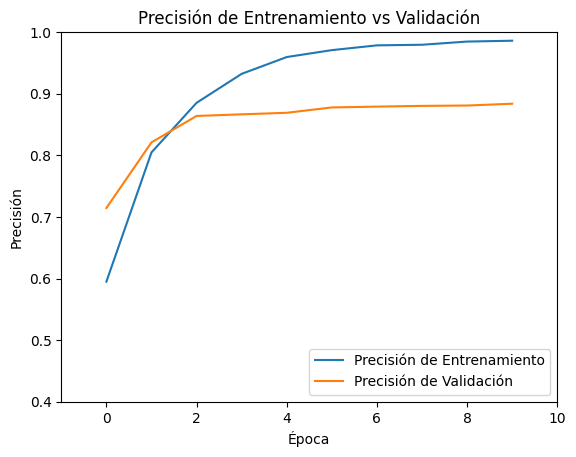

In [5]:
# CNN Accuracy Results
# Mostrar precisión de entrenamiento vs validación durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0.4, 1])
plt.xlim([-1, len(history.history['accuracy'])])
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento vs Validación')
plt.show()

**Predictions with the trained CNN.**

213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
La red dice que la imagen es clase 'MildDemented' y la clase verdadera es: 'VeryMildDemented'


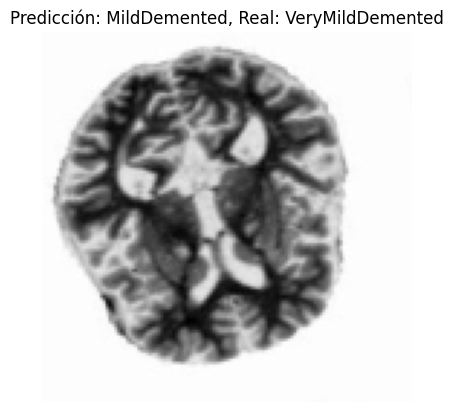

La red dice que la imagen es clase 'MildDemented' y la clase verdadera es: 'MildDemented'


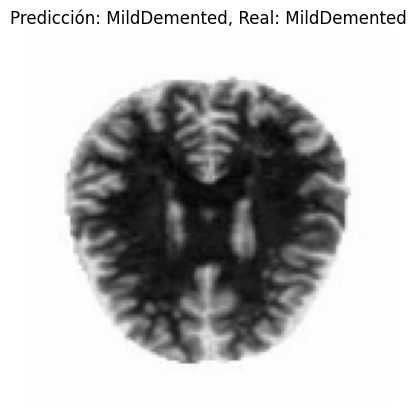

La red dice que la imagen es clase 'ModerateDemented' y la clase verdadera es: 'ModerateDemented'


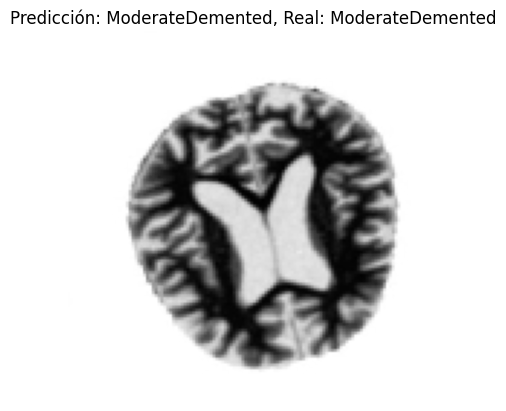

La red dice que la imagen es clase 'MildDemented' y la clase verdadera es: 'MildDemented'


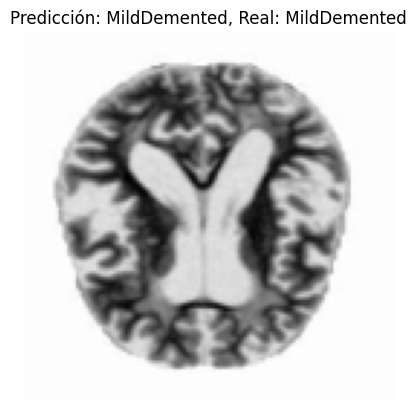

La red dice que la imagen es clase 'MildDemented' y la clase verdadera es: 'VeryMildDemented'


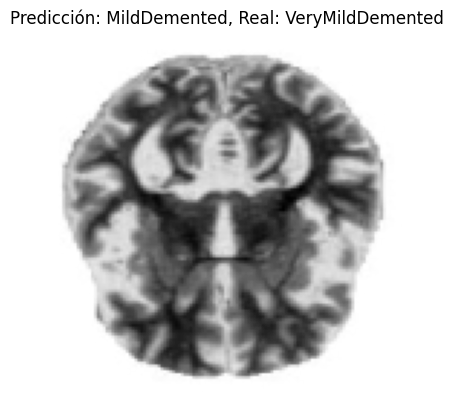

La red dice que la imagen es clase 'NonDemented' y la clase verdadera es: 'NonDemented'


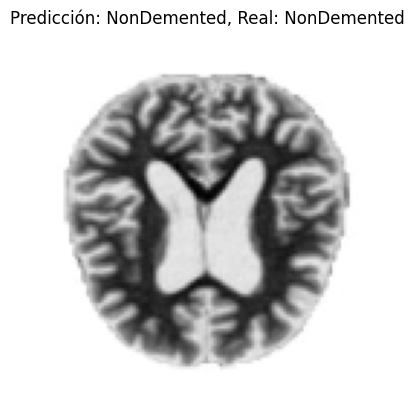

La red dice que la imagen es clase 'VeryMildDemented' y la clase verdadera es: 'VeryMildDemented'


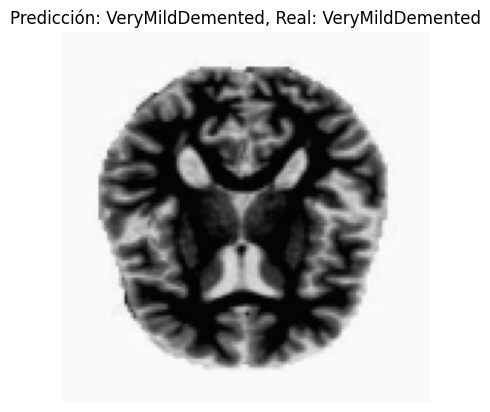

La red dice que la imagen es clase 'NonDemented' y la clase verdadera es: 'NonDemented'


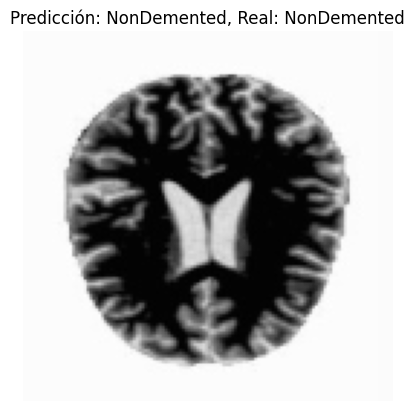

La red dice que la imagen es clase 'NonDemented' y la clase verdadera es: 'NonDemented'


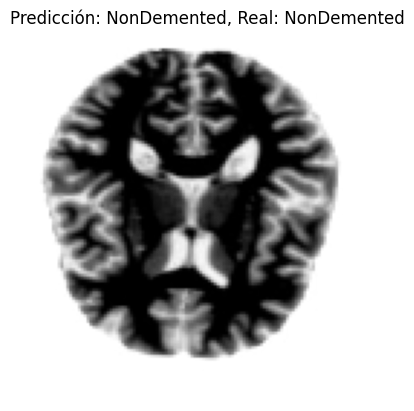

La red dice que la imagen es clase 'NonDemented' y la clase verdadera es: 'VeryMildDemented'


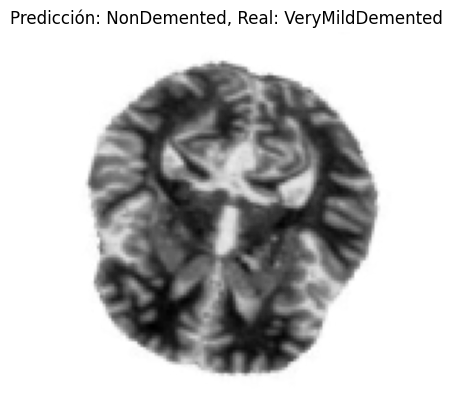

In [6]:
# Predictions with the trained CNN.
predictions = model.predict(test_images.reshape(-1, 128, 128, 1))

# Mostrar al menos 10 predicciones con sus respectivas etiquetas verdaderas.
for i in range(10):
    predicted_label_index = np.argmax(predictions[i])  # Índice de la clase predicha
    true_label_index = test_labels[i]  # Índice de la clase real

    # Obtener las categorías usando el diccionario inverso
    predicted_category = inverse_category_mapping[predicted_label_index]
    true_category = inverse_category_mapping[true_label_index]

    print(f"La red dice que la imagen es clase '{predicted_category}' y la clase verdadera es: '{true_category}'")

    # Mostrar la imagen con su predicción
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicción: {predicted_category}, Real: {true_category}")
    plt.axis('off')
    plt.show()

# References

*   https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
*   https://www.tensorflow.org/tutorials/images/cnn?hl=es-419
*   https://keras.io/api/datasets/mnist/
*   https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
